# Régression Linéaire - Théorie et implémentation avec `python`

## Conception :

|Auteur|Centre|Modification|Date|
|---|---|---|---|
|P. Halftermeyer|Orléans|première version|2018/11/23|

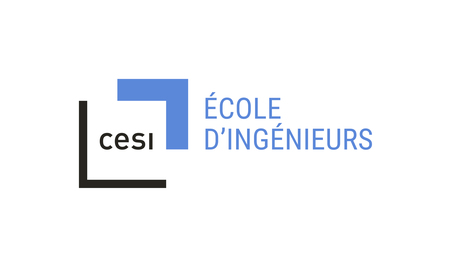

## Génération de la présentation

voir [Transformer un notebook jupyter en présentation](https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67)

## Setup

Configuration préalable du notebook

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Définition du modèle

Le _modèle linéaire_ peut s'écrire de la forme :

$$\newcommand\x{\mathbf{x}}
\newcommand\X{\mathbf{X}}
\newcommand\y{\mathbf{y}}
\newcommand\Y{\mathbf{Y}}
\newcommand\RMSE{\mbox{RMSE}}
\newcommand\MSE{\mbox{MSE}}
\newcommand\bigO{\mathcal{O}}$$
$$\hat{y} = \theta_0 + \theta_1 x_1+ \dots +\theta_n x_n$$

avec $x_i$ la $i$-ème _feature_ de l'instance $\x$ et $\theta_j$ le $j$-ème paramètre du modèle.

La variable cible est exprimée comme une combinaison linéaire des variables d'entrée à laquelle s'ajoute un terme constant nommé _biais_, _ordonnée à l'origine_ ou _$y$-intercept_ en Anglais.

On peut l'écrire sous forme vectorielle :

$$
\hat{y} = h_\theta(\x) = \theta^T\cdot\x
$$

avec
$\theta =
\begin{pmatrix}
    \theta_0\\
    \vdots\\
    \theta_n
\end{pmatrix}$
et
$\x =
\begin{pmatrix}
    x_0=1\\
    x_1\\
    \vdots\\
    x_n
\end{pmatrix}$

L'opérateur $T$ en exposant est une transposition.

## Entraînement du modèle

Entraîner un tel modèle équivaut à fixer les paramètre $\theta_i$ qui _épousent_ au mieux notre jeu de données. C'est-à-dire qu'il faut minimiser une fonction de coût représentant l'erreur commise par notre modèle sur le jeu d'entraînement.

### Fonction de coût : _RMSE_ et _MSE_

La fonction _RMSE_ (_rooted mean squared error_) calcule la moyenne des carrés des distances prédiction-_label_ et passe à la racine carrée. Il est équivalent de minimiser la _RMSE_ ou son carré, la _MSE_

$$\RMSE(\X,h_\theta)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}{\left(h_\theta(\x^{(i)})-y^{(i)}\right)^2}}$$
$$\MSE(\X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}{\left(h_\theta(\x^{(i)})-y^{(i)}\right)^2}$$
$$\MSE(\X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}{\left(\theta^T \cdot \x^{(i)}-y^{(i)}\right)^2}$$

avec :
- $m$ le nombre d'instances de notre jeu d'entraînement.
- $\x^{(i)}$ la $i$-ème instance et $y^{(i)}$ le $i$-ème _label_.

### Equation normale

#### Définition

Il existe une équation dite _équation normale_ permettant de calculer de manière directe la valeur de $\theta$ qui minimise la fonction de coût.

$$\hat{\theta} = \left(\X^T\cdot\X\right)^{-1}\cdot\X^T\cdot\y$$

Avec :
- $\hat{\theta}$ la valeur de $\theta$ qui minimise la fonction de coût.
- $\X$ la matrice $(n+1) \times m$ contenant toutes les données d'entrée.
    
    La $i$-ème ligne de $\X$ est $\x_i^T =
\begin{pmatrix}
    1 & x^{(i)}_1 & \dots & x^{(i)}_n
\end{pmatrix}$

    On a donc :
$$\X =
\begin{pmatrix}
    1 & x^{(1)}_1 & \dots & x^{(1)}_n\\
    1 & x^{(2)}_1 & \dots & x^{(2)}_n\\
    \vdots & \vdots & \ddots & \vdots\\
    1 & x^{(m)}_1 & \dots & x^{(m)}_n\\
\end{pmatrix}$$

et sa transposée $\X^T$ la matrice $m \times (n+1)$ suivante :
    
$$\X^T =
\begin{pmatrix}
    1 & 1 & \dots & 1\\
    x^{(1)}_1 & x^{(2)}_1 & \dots & x^{(m)}_1\\
    \vdots & \vdots & \ddots & \vdots\\
    x^{(1)}_n & x^{(2)}_m & \dots & x^{(m)}_n\\
\end{pmatrix}$$

- $\y$ le vecteur des _targets_ :
$$\y =
\begin{pmatrix}
    y_1\\
    y_2\\
    \vdots\\
    y_m
\end{pmatrix}$$

#### Utilisation de l'équation normale

##### Constitution d'un jeu de données

Nous allons fabriquer un jeu de données simulant un modèle linéaire, dont les entrées sont de dimension 1, et de la forme $\y = 3 + \frac{3}{2} \cdot \X$.

Générons 100 instances aléatoirement :

In [2]:
X = 10 * np.random.rand(100,1)
noise = (4*(np.random.rand(100,1) - .5))**3
y = 3 + 1.5 * X + noise

Observons le résultat :

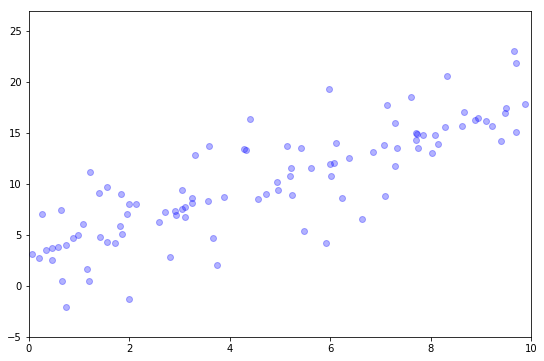

In [32]:
plt.figure(figsize=(9,6))
plt.plot(X,y,"ob", alpha=0.3)
plt.axis([0,10,-5,27])
plt.show()

##### Calcul de $\hat\theta$

Puis utilisons l'équation normale $\hat{\theta} = \left(\X^T\cdot\X\right)^{-1}\cdot\X^T\cdot\y$ pour trouver les paramètres minimisant la fonction de coût.

In [4]:
X_bold = np.c_[np.ones((100, 1)), X] # On ajoute les 1 à toutes les instances
θ_hat = np.linalg.inv(X_bold.T.dot(X_bold)).dot(X_bold.T).dot(y)
θ_hat

array([[3.03853342],
       [1.50564934]])

Nous obtenons un vecteur
$
\hat\theta \approx
\begin{pmatrix}
    3.04\\
    1.51
\end{pmatrix}
$
là où nous attendions
$
\begin{pmatrix}
    3\\
    \frac{3}{2}
\end{pmatrix}
$.

C'est très satisfaisant vu la quantité de bruit injectée.

##### Prédiction

Le modèle maintenant entraîné, on peut réaliser des prédictions.

> **Propriété** : Si le produit matricielle $A\cdot B$ est défini, alors $A^T\cdot B^T = (B\cdot A)^T$

On sait que pour une entrée $\x$ donnée, $\hat{y} = \theta^T\cdot\x$.
Donc pour un lot d'instances à prédire, représenté par la matrice $\X$ dont chaque ligne est une donnée d'entrée :


$$\hat\Y^T = \theta^T\cdot\X^T\\
\hat\Y=  {(\X\cdot\theta)^T}^T = \X\cdot\theta$$




In [5]:
X_new = np.array([[0],[10]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(θ_hat)
y_predict

array([[ 3.03853342],
       [18.09502678]])

On peut tracer la droite représentant notre modèle à partir de ces deux prédictions.

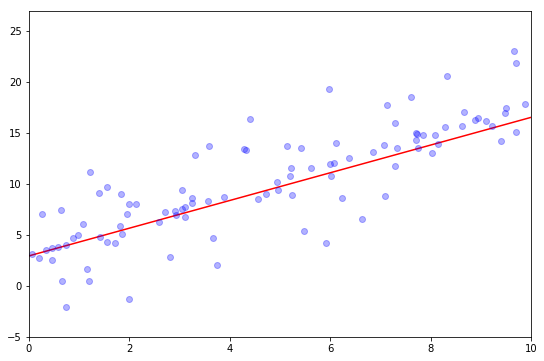

In [33]:
plt.figure(figsize=(9,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"ob", alpha=0.3)
plt.axis([0,10,-5,27])
plt.show()

##### Utilisation de `scikit-learn`

On peut obtenir un résultat équivalent avec `scikit-learn` :

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.03853342]), array([[1.50564934]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.03853342],
       [18.09502678]])

Nous obtenons exactement le même résultat.

#### Complexité algorithmique

##### Entraînement

En terme de complexité, c'est l'inversion de la matrice $\X^T\cdot\X$, de dimension $(n+1) \times (n+1)$ qui est l'opération la plus coûteuse.

Le temps-machine nécessaire à inverser une telle matrice est compris, selon les opportunités d'optimisation, entre $\bigO(n^{2.4})$ et $\bigO(n^3)$.

Une telle complexité peut devenir très génante lorsque le nombre de _features_ devient très grand (plusieurs dizaines de milliers par exemple).

D'un autre côté, la complexité est linéaire en terme de nombre d'instances du jeu d'entraînement ($\bigO(m)$). Celà permet de manipuler de grands jeu de données de manière tout à fait acceptable pourvu qu'il soit possible de les contenir _in memory_.

##### Prédiction

La prédiction est linéaire aussi bien en fonction du nombre d'entrées à évaluer qu'en fonction du nombre de _features_, soit $\bigO(n \cdot m)$. C'est en général tout à fait satisfaisant.


##### Limites

Lorsque le nombre de _features_ est trop élevé ou lorsque le jeu d'entraînement ne tient pas _in memory_, il existe d'autres moyens d'entraîner nos modèles.

### Descente de Gradient

#### Principe

La descente de gradient est une méthode _heuristique_ visant à trouver une solution optimale dans un grand espace de recherche.

Cette méthode consiste grossièrement à se déplacer dans le sens de la plus grande pente pour atteindre un minimum.

En terme plus scientifiques, on choisit au hasard une première valeur de $\theta$ puis on mesure localement le _gradient_ de la fonction de coût par rapport aux composantes du vecteur $\theta$. Ensuite, et jusqu'à une condition de fin (nombre d'itération, gradient nul, _etc_.), on calcule répétitivement une nouvelle valeur de $\theta$ afin de le déplacer dans la direction descendante de ce gradient.

Un _hyper-paramètre_ important de cet algorithme est le _learning rate_, c'est à dire le facteur multiplicatif que l'on applique au gradient pour quantifier la grandeur du déplacement à chaque itération. Si ce paramètre est trop petit, trop d'itérations seront nécessaires, s'il est trop grand, on n'est pas sûr de converger vers un minimum (serait-il seulement local).

#### Pour la régression linéaire

##### Convergence garantie

Nous avons évoqué juste au dessus le risque de converger vers des optima locaux. Ce risque n'existe pas dans le cas de la recherche du _MSE_ d'un modèle linéaire paramétré par $\theta$. En effet, la fonction de coût s'avère [convexe](https://fr.wikipedia.org/wiki/Fonction_convexe). De plus, elle est continue et de dérivée continue (et même [_lipschitzienne_](https://fr.wikipedia.org/wiki/Application_lipschitzienne) pour employer un terme technique).

On peut se représenter $\MSE(\theta)$ comme un bol $n$-dimensionel sans aspérités.

Ces bonnes propriétés donne la garantie que, si le _learning rate_ n'est pas trop élevé, on convergera bien vers le minimum.

##### De l'utilité de la mise à l'échelle des features

Il est bon de remarquer qu'une différence d'échelle trop importante entre les différentes _features_ peut ralentir la convergence de la descente de gradient. En effet, la pente douce d'une _feature_ aux valeurs très étendues aura moins d'impact sur le gradient qu'une _feature_ aux valeurs plus concentrées. Cela pourra provoquer une déscente, d'abord rapide, dans une valée toute en longueur qu'il sera très fastidieux de longer.

> **_Nota bene_** : Lorsqu'on utilise une descente de gradient, il faut prendre soin de mettre les variables à l'échelle. On peut par exemple utiliser le `StandardScaler` de `scikit-learn`.

#### Descente de gradient _batch_

##### Dérivée partielle

Le gradient de la fonction $\MSE$ est composé des [_dérivées partielles_](https://fr.wikipedia.org/wiki/D%C3%A9riv%C3%A9e_partielle) de $MSE$ selon chaque paramètre $\theta_j$. On note une telle dérivée partielle comme ceci : $\frac{\partial}{\partial\theta_j}\MSE(\theta)$.

###### Equation de la dérivée partielle de la fonction de coût

$$\frac{\partial}{\partial\theta_j}\MSE(\theta)
=
\frac{2}{m}\sum_{i=1}^{m}{\left(\theta^T \cdot \x^{(i)}-y^{(i)}\right)}{x_j}^{(i)}$$

##### Gradient

Ce qui donne pour le gradient :

$$\nabla_\theta\MSE(\theta)=
\begin{pmatrix}
        \frac{\partial}{\partial\theta_0}\MSE(\theta)\\
        \frac{\partial}{\partial\theta_1}\MSE(\theta)\\
        \vdots\\
        \frac{\partial}{\partial\theta_n}\MSE(\theta)
    \end{pmatrix}
=
\frac{2}{m}\X^T\cdot(\X\cdot\theta-\y)$$

##### Direction

Lorsqu'on a obtenu le gradient, qui va _vers le haut_, on doit déplacer $\theta$ dans la direction opposée proportionnellement à la norme du gradient et au _learning rate_ $\eta$.

$$\theta' = \theta - \eta\nabla_\theta\MSE(\theta)$$

##### Implémentation

Une fois l'algorithme décrypté, son implémentation basique est assez _directe_. On obtient de bons résultats.

In [9]:
np.random.seed(42)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

η = 0.02

n_iterations = 300
m = 100

θ = np.random.randn(2,1) # initialisation

for iteration in range(n_iterations):
    nabla = (2/m) * X_bold.T.dot(X_bold.dot(θ) - y)
    θ = θ - η * nabla

θ

array([[2.95981255],
       [1.5177486 ]])

##### Tuning : _learning rate_

Comparons le comportement de notre algorithme selon le _learning rate_ $\eta$. On voit très bien que si $\eta$ est trop petit, la convergence n'est pas assurée avec un nombre d'itération fixe. Et que, à l'inverse, si $\eta$ est trop grand, on peut voir l'algorithme diverger pure et simplement.

In [30]:
def plot_GD(η,ax,caption):
    θ = np.random.randn(2,1) # initialisation

    ax.title.set_text(caption + ' : η = ' + str(η))

    for iteration in range(n_iterations):    
        y_predict = X_new_b.dot(θ)
        ax.plot(X_new, y_predict, "r-", alpha=0.2)
        nabla = (2/m) * X_bold.T.dot(X_bold.dot(θ) - y)
        θ = θ - η * nabla
    ax.plot(X,y,"ob", alpha=0.3)
    ax.axis([0,10,-5,27])

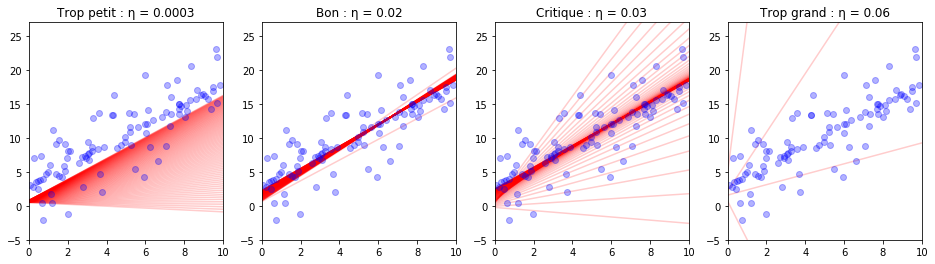

In [31]:
np.random.seed(42)

n_iterations = 100
m = 100

fig = plt.figure(figsize=(16,4))

ax_list=[(141,0.0003,'Trop petit'),(142,0.02, 'Bon'),(143,0.03,'Critique'),(144,0.06,'Trop grand')]


for ax in ax_list:
    plot_GD(ax[1], plt.subplot(ax[0]), ax[2])

plt.show()

A gauche, le _learning rate_ est trop faible, on n'atteint pas la convergence, à doite, il est trop élevé et on diverge. On pourrait utiliser un _grid search_ pour fixer un $\eta$ satisfaisant.

##### Tuning : nombre d'itération

Comment fixer un nombre d'itération satisfaisant ? On peut se contenter de modifier la condition de fin et s'arrêter lorsque le gradient devient assez petit. Par exemple, lorsque sa norme est inférieur à une _tolérance_ fixée notée $\epsilon$.

Pour un $\eta$ fixé, tel que l'algorithme converge, le temps de convergence est $\bigO(1 / \epsilon)$.

#### Descente de gradient _stochastique_

##### Présentation

Une des limites de la déscente de gradient _batch_ est la nécessité de prendre en compte l'intégralité du _jeu d'entraînement_ entier à chaque étape. L'alternative _stochastique_, à l'inverse, se contente de calculer le gradient à partir d'une seule instance choisie au hasard. Cela rend, d'une part, les étapes beaucoup plus rapides et, de l'autre, la prise en main de grands jeux de données envisageable.

En revanche, l'_aspect_ randomisé de l'algorithme rend sa convergence plus chaotique. On a une convergence _en moyenne_ avec la garantie d'obtenir une bonne solution approchée de qualité mais pas forcément optimale. Pour palier ce comportement, on utilise la technique du [_recuit simulé_](https://fr.wikipedia.org/wiki/Recuit_simul%C3%A9) : on fait décroître le learning rate progressivement selon un _learning schedule_.

##### Implémentation

In [11]:
np.random.seed(42)

n_epochs = 50
t0, t1 = 3, 400 # hyperparametres du learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

θ = np.random.randn(2,1) # initialisation de θ

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_bold[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        nabla_loc = 2 * xi.T.dot(xi.dot(θ) - yi)
        η = learning_schedule(epoch * m + i)
        θ = θ - η * nabla_loc
        
θ

array([[3.03912065],
       [1.4813235 ]])

On appel _epoch_ un cycle de présentation de toute les données si on a mélangé le jeu, ou d'un ensemble de données de taille $m$ si on choisit les instances aléatoirement.
On peut observer _epoch_ par _epoch_ la convergence des données.

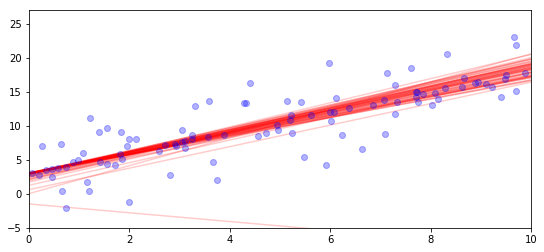

In [37]:
plt.figure(figsize=(9,4))

θ = np.random.randn(2,1) # initialisation de θ

for epoch in range(n_epochs):
    y_predict = X_new_b.dot(θ)
    plt.plot(X_new, y_predict, "r-", alpha=0.2)
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_bold[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        nabla_loc = 2 * xi.T.dot(xi.dot(θ) - yi)
        η = learning_schedule(epoch * m + i)
        θ = θ - η * nabla_loc
        
plt.plot(X,y,"ob", alpha=0.3)
plt.axis([0,10,-5,27])

plt.show()

On constate que les étapes sont moins régulières que précédemment.

##### Avec `scikit-learn`

On peut obtenir un résultat similaire avec `scikit-learn` :

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=150, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=150,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.0192283]), array([1.48898618]))

#### Descente de gradient par mini-_batch_

Une approche hybride entre l'approche _batch_ et l'approche _stochastique_ et le calcul du gradient, à chaque itération, sur un mini-lot de données d'entrées choisies au hasard. Cette méthode converge plus rapidement que le gradient stochastique mais le risque de converger vers un extremum local est supérieur.

### Comparaison des algorithmes

|Algorithme|$m$ grand|memoire externe|$n$ grand|hyperparamètres|mise à l'échelle requise|`scikit-learn`|
|---|---|---|---|---|---|---|
|_Equation Normale_|Rapide|Non|Lent|$0$|Non|`LinearRegressor`|
|_DG batch_|Lent|Non|Rapide|$2$|Oui|Non|
|_DG stochastique_|Rapide|Oui|Rapide|$\ge 2$|Oui|`SGDRegressor`|
|_DG mini-batch_|Rapide|Oui|Rapide|$\ge 2$|Oui|`SGDRegressor`|


### Bibliographie

FRIEDMAN, Jerome, HASTIE, Trevor, et TIBSHIRANI, Robert. The elements of statistical learning. 2001.

GÉRON, Aurélien. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. 2017.

Documentation de [`scikit-learn`](https://scikit-learn.org/stable/documentation.html)

Documentation de [`scipy`](https://www.scipy.org/docs.html)